**Memprediksi Penyakit Jantung dengan Machine Learning**


Diberikan dataset rekam medis pasien, akan diprediksi apakah pasien memiliki penyakit jantung atau tidak.

Data Description
1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
    * 0: Typical angina: Chest pain caused by reduced blood flow to the heart.
    * 1: Atypical angina: Chest pain that is not related to the heart.
    * 2: Non-anginal pain: Usually caused by esophageal spasms, not related to the heart.
    * 3: Asymptomatic: No chest pain or signs of heart disease.
4. trestbps: resting blood pressure
    * anything above 130-140 is typically cause for concern
5. chol: serum cholestoral in mg/dl
    * above 200 is cause for concern
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg: the condition of the heart at rest
    * 0: Normal
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope: the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca: number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal: 1 = normal; 2 = fixed defect; 3 = reversable defect
14. target: have disease or not (1=yes, 0=no) (= the predicted attribute)
    * Value 0: < 50% diameter narrowing
    * Value 1: > 50% diameter narrowing


# Import Module

In [ ]:
import numpy as np              # Perhitungan numerik
import pandas as pd             # Analisis data
# Plotting/ visualisasi data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

# Evaluasi model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Read CSV

In [ ]:
heart_data = pd.read_csv('heart_disease_data.csv')

In [ ]:
heart_data.shape

(303, 14)

In [ ]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# EDA

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Jumlah pasien yang memiliki jantung bermasalah dan jantung sehat.**

* Jantung bermasalah - 1
* Jantung sehat - 0

In [ ]:
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Text(0.5, 0, '1=Jantung Bermasalah, 0=Jantung Sehat')

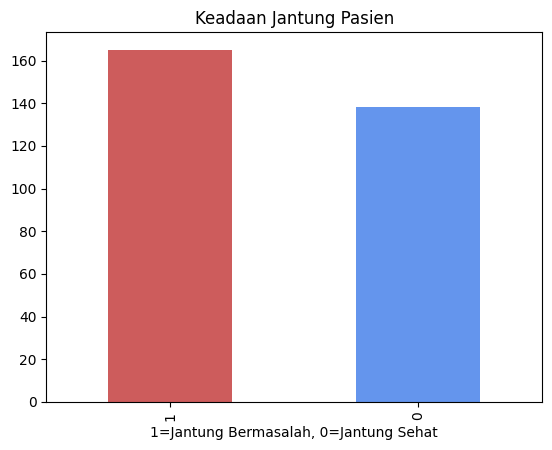

In [ ]:
heart_data["target"].value_counts().plot(kind="bar", color=['indianred', 'cornflowerblue'])
plt.title("Keadaan Jantung Pasien")
plt.xlabel("1=Jantung Bermasalah, 0=Jantung Sehat")

**Penyakit jantung berdasarkan jenis kelamin.**
* Pria  - 1
* Wanita - 0



In [ ]:
# Compare kolom target dan kolom jenis kelamin
pd.crosstab(heart_data.target, heart_data.sex)

sex,0,1
target,,
0,24,114
1,72,93


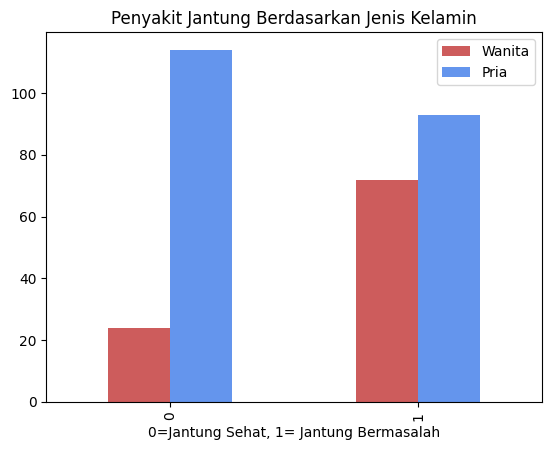

In [ ]:
pd.crosstab(heart_data.target, heart_data.sex).plot(kind="bar", color=["indianred", "cornflowerblue"])
plt.title("Penyakit Jantung Berdasarkan Jenis Kelamin")
plt.xlabel("0=Jantung Sehat, 1= Jantung Bermasalah")
plt.legend(["Wanita", "Pria"])

**Matriks Korelasi**

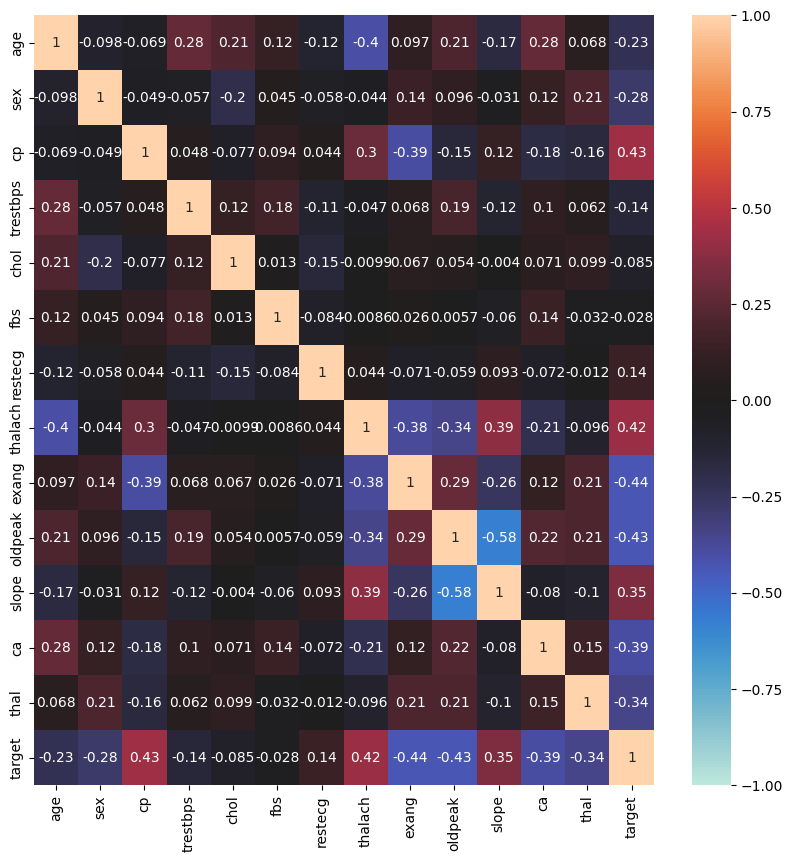

In [ ]:
corr = heart_data.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot=True)
plt.show()

Dari heatmap, terlihat bahwa variable yang paling memiliki keterkaitan dengan variable target, yaitu ```thalach``` (tingkat detak jantung maksimum) dan ```cp``` (tingkat nyeri dada)





**Hubungan usia dan tingkat detak jantung maksimum.**

In [ ]:
heart_data["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

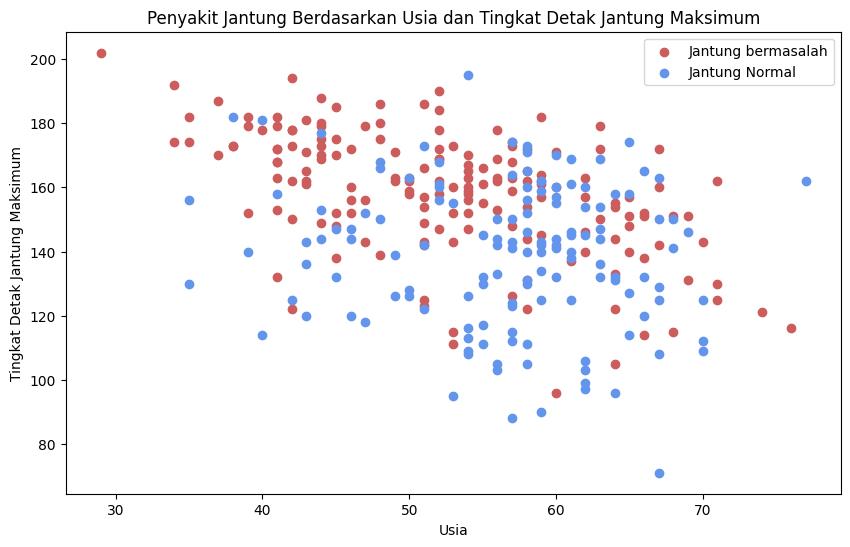

In [ ]:
plt.figure(figsize=(10,6))

plt.scatter(heart_data.age[heart_data.target==1],
            heart_data.thalach[heart_data.target==1],
            c="indianred")

plt.scatter(heart_data.age[heart_data.target==0],
            heart_data.thalach[heart_data.target==0],
            c="cornflowerblue")

plt.title("Penyakit Jantung Berdasarkan Usia dan Tingkat Detak Jantung Maksimum")
plt.xlabel("Usia")
plt.legend(["Jantung bermasalah", "Jantung Normal"])
plt.ylabel("Tingkat Detak Jantung Maksimum");

**Penyakit jantung menurut jenis nyeri dada.**

In [ ]:
pd.crosstab(heart_data.cp, heart_data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


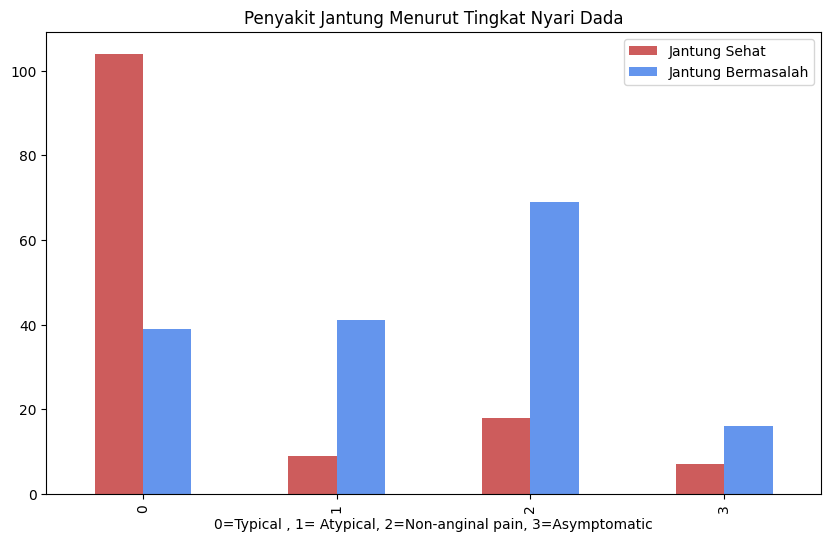

In [ ]:
pd.crosstab(heart_data.cp, heart_data.target).plot(kind="bar",
                                   figsize=(10,6),
                                   color= ["indianred","cornflowerblue"])
plt.title("Penyakit Jantung Menurut Tingkat Nyari Dada")
plt.xlabel("0=Typical , 1= Atypical, 2=Non-anginal pain, 3=Asymptomatic")
plt.legend(["Jantung Sehat", "Jantung Bermasalah"])

# Modelling

##Feature Engineering

##Encoding

In [ ]:
categorical_val = []
numerical_val = []
for column in heart_data.columns:
  if heart_data[column].nunique() <=10:
    categorical_val.append(column)
  else:
    numerical_val.append(column)
print(categorical_val)
print(numerical_val)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [ ]:
categorical_val.remove('sex')
categorical_val.remove('target')
heart_data = pd.get_dummies(heart_data,columns=categorical_val,drop_first=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
heart_data[numerical_val] = minmax.fit_transform(heart_data[numerical_val])


##Splitting Fitur dan *Target*

In [ ]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [ ]:
print(X)

          age  sex  trestbps      chol   thalach   oldpeak  cp_1  cp_2  cp_3  \
0    0.708333    1  0.481132  0.244292  0.603053  0.370968     0     0     1   
1    0.166667    1  0.339623  0.283105  0.885496  0.564516     0     1     0   
2    0.250000    0  0.339623  0.178082  0.770992  0.225806     1     0     0   
3    0.562500    1  0.245283  0.251142  0.816794  0.129032     1     0     0   
4    0.583333    0  0.245283  0.520548  0.702290  0.096774     0     0     0   
..        ...  ...       ...       ...       ...       ...   ...   ...   ...   
298  0.583333    0  0.433962  0.262557  0.396947  0.032258     0     0     0   
299  0.333333    1  0.150943  0.315068  0.465649  0.193548     0     0     1   
300  0.812500    1  0.471698  0.152968  0.534351  0.548387     0     0     0   
301  0.583333    1  0.339623  0.011416  0.335878  0.193548     0     0     0   
302  0.583333    0  0.339623  0.251142  0.786260  0.000000     1     0     0   

     fbs_1  ...  exang_1  slope_1  slop

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


## Splitting Data Menjadi Data Train dan Data Test

Karena sumber tidak memprovide data train dan data test, maka harus dilakukkan data splitting.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(303, 22) (242, 22) (61, 22)


## Logistic Regression

In [ ]:
# training data
model1 = LogisticRegression(random_state=42)
model1 = model1.fit(X_train, Y_train)

In [ ]:
# akurasi data yang sudah di training
X_train_prediction = model1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.871900826446281


In [ ]:
# hasil prediksi
Y_pred = model1.predict(X_test)
test_data_accuracy = accuracy_score(Y_pred, Y_test)
f1 = f1_score(Y_test,Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)

print('Accuracy dengan Model Logistic Regression: ', test_data_accuracy)
print('f1 score dengan Model Logistic Regression: ', f1)
print('Precision dengan Model Logistic Regression: ', precision)
print('Recall dengan Model Logistic Regression: ', recall)

Accuracy dengan Model Logistic Regression:  0.819672131147541
f1 score dengan Model Logistic Regression:  0.8253968253968254
Precision dengan Model Logistic Regression:  0.8666666666666667
Recall dengan Model Logistic Regression:  0.7878787878787878


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

def evaluation_parametrics(name,y_val, y_pred):

    print("\n------------------------{}------------------------\n".format(name))

    cm_test = confusion_matrix(y_val, y_pred)
    t1 = ConfusionMatrixDisplay(cm_test)
    print("\nClassification Report for Data Test\n")
    print(classification_report(y_val, y_pred))
    print("--------------------------------------------------------------------------")

    t1.plot()


------------------------Machine Learning - Classification------------------------


Classification Report for Data Test

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        28
           1       0.87      0.79      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

--------------------------------------------------------------------------


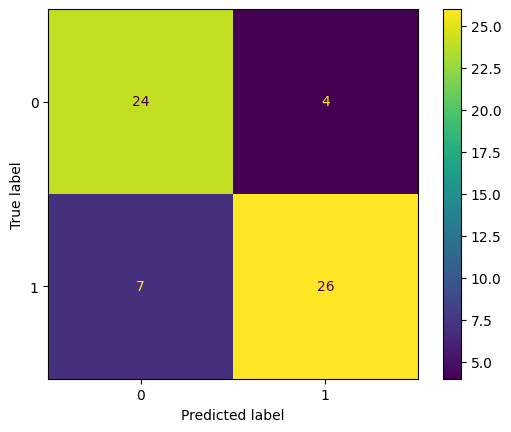

In [ ]:
evaluation_parametrics("Machine Learning - Classification", Y_test, Y_pred)

## Neural Network

In [ ]:
# preprocessing neural network
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [ ]:
# training data
model2 = MLPClassifier(hidden_layer_sizes=(3,),learning_rate_init=0.1,max_iter=100,  random_state=42)
model2 = model2.fit(X_train, Y_train)

In [ ]:
# akurasi data yang sudah di training
X_train_prediction = model2.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8801652892561983


In [ ]:
# hasil prediksi
Y_pred = model2.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, Y_pred)
f1 = f1_score(Y_test,Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)

print('Akurasi dengan Model Neural Network: ', test_data_accuracy)
print('f1 score dengan Model Neural Network: ', f1)
print('Precision dengan Model Neural Network: ', precision)
print('Recall dengan Model Neural Network: ', recall)

Akurasi dengan Model Neural Network:  0.8524590163934426
f1 score dengan Model Neural Network:  0.8615384615384615
Precision dengan Model Neural Network:  0.875
Recall dengan Model Neural Network:  0.8484848484848485



------------------------Machine Learning - Classification------------------------


Classification Report for Data Test

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.88      0.85      0.86        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

--------------------------------------------------------------------------


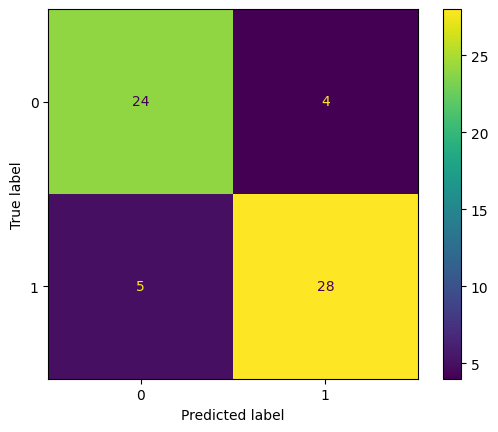

In [ ]:
evaluation_parametrics("Machine Learning - Classification", Y_test, Y_pred)

## Support Vector Machine (SVM)

### SVM dengan linear kernel

In [ ]:
# Training data
model4_linear = svm.SVC(kernel="linear")
model4_linear.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
# Akurasi data yang sudah di training
X_train_prediction_model4_linear = model4_linear.predict(X_train)
training_data_accuracy_model4_linear = accuracy_score(
    X_train_prediction_model4_linear, Y_train
)

print('Accuracy on Training data : ', training_data_accuracy_model4_linear)

Accuracy on Training data :  0.8966942148760331


In [ ]:
# Hasil prediksi
Y_pred_model4_linear = model4_linear.predict(X_test)
test_data_accuracy_model4_linear = accuracy_score(Y_test, Y_pred_model4_linear)
f1_model4_linear = f1_score(Y_test, Y_pred_model4_linear)
precision_model4_linear = precision_score(Y_test, Y_pred_model4_linear)
recall_model4_linear = recall_score(Y_test, Y_pred_model4_linear)

print('Akurasi dengan Model SVM (Linear Kernel): ', test_data_accuracy_model4_linear)
print('f1 score dengan Model SVM (Linear Kernel): ', f1_model4_linear)
print('Precision dengan Model SVM (Linear Kernel): ', precision_model4_linear)
print('Recall dengan Model SVM (Linear Kernel): ', recall_model4_linear)

Akurasi dengan Model SVM (Linear Kernel):  0.7868852459016393
f1 score dengan Model SVM (Linear Kernel):  0.8
Precision dengan Model SVM (Linear Kernel):  0.8125
Recall dengan Model SVM (Linear Kernel):  0.7878787878787878



------------------------Machine Learning - Classification------------------------


Classification Report for Data Test

              precision    recall  f1-score   support

           0       0.76      0.79      0.77        28
           1       0.81      0.79      0.80        33

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61

--------------------------------------------------------------------------


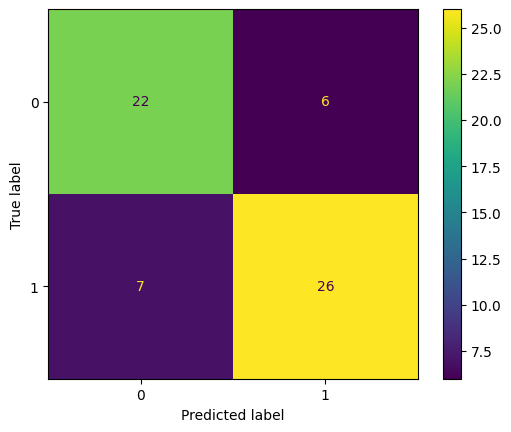

In [ ]:
evaluation_parametrics("Machine Learning - Classification", Y_test, Y_pred_model4_linear)

### SVM dengan polynomial kernel

In [ ]:
# Training data
model4_poly = svm.SVC(kernel="poly")
model4_poly.fit(X_train, Y_train)

SVC(kernel='poly')

In [ ]:
# Akurasi data yang sudah di training
X_train_prediction_model4_poly = model4_poly.predict(X_train)
training_data_accuracy_model4_poly = accuracy_score(
    X_train_prediction_model4_poly, Y_train
)

print('Accuracy on Training data : ', training_data_accuracy_model4_poly)

Accuracy on Training data :  0.9504132231404959


In [ ]:
# Hasil prediksi
Y_pred_model4_poly = model4_poly.predict(X_test)
test_data_accuracy_model4_poly = accuracy_score(Y_test, Y_pred_model4_poly)
f1_model4_poly = f1_score(Y_test, Y_pred_model4_poly)
precision_model4_poly = precision_score(Y_test, Y_pred_model4_poly)
recall_model4_poly = recall_score(Y_test, Y_pred_model4_poly)

print('Akurasi dengan Model SVM (Polynomial Kernel): ', test_data_accuracy_model4_poly)
print('f1 score dengan Model SVM (Polynomial Kernel): ', f1_model4_poly)
print('Precision dengan Model SVM (Polynomial Kernel): ', precision_model4_poly)
print('Recall dengan Model SVM (Polynomial Kernel): ', recall_model4_poly)

Akurasi dengan Model SVM (Polynomial Kernel):  0.8032786885245902
f1 score dengan Model SVM (Polynomial Kernel):  0.823529411764706
Precision dengan Model SVM (Polynomial Kernel):  0.8
Recall dengan Model SVM (Polynomial Kernel):  0.8484848484848485



------------------------Machine Learning - Classification------------------------


Classification Report for Data Test

              precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61

--------------------------------------------------------------------------


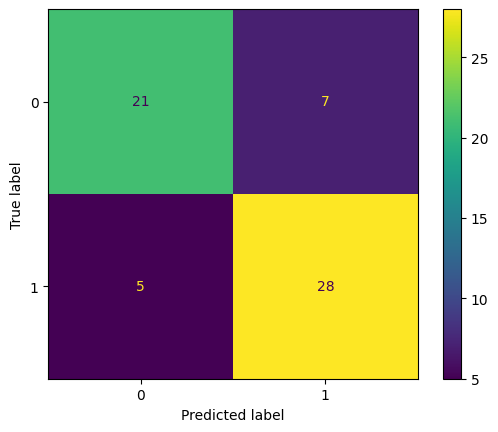

In [ ]:
evaluation_parametrics("Machine Learning - Classification", Y_test, Y_pred_model4_poly)

### SVM dengan radial basis function (RBF) kernel

In [ ]:
model4_rbf = svm.SVC(kernel="rbf")
model4_rbf.fit(X_train, Y_train)

SVC()

In [ ]:
# Akurasi data yang sudah di training
X_train_prediction_model4_rbf = model4_rbf.predict(X_train)
training_data_accuracy_model4_rbf = accuracy_score(
    X_train_prediction_model4_rbf, Y_train
)

print('Accuracy on Training data : ', training_data_accuracy_model4_rbf)

Accuracy on Training data :  0.9173553719008265


In [ ]:
# Hasil prediksi
Y_pred_model4_rbf = model4_rbf.predict(X_test)
test_data_accuracy_model4_rbf = accuracy_score(Y_test, Y_pred_model4_rbf)
f1_model4_rbf = f1_score(Y_test, Y_pred_model4_rbf)
precision_model4_rbf = precision_score(Y_test, Y_pred_model4_rbf)
recall_model4_rbf = recall_score(Y_test, Y_pred_model4_rbf)

print('Akurasi dengan Model SVM (RBF Kernel): ', test_data_accuracy_model4_rbf)
print('f1 score dengan Model SVM (RBF Kernel): ', f1_model4_rbf)
print('Precision dengan Model SVM (RBF Kernel): ', precision_model4_rbf)
print('Recall dengan Model SVM (RBF Kernel): ', recall_model4_rbf)

Akurasi dengan Model SVM (RBF Kernel):  0.7704918032786885
f1 score dengan Model SVM (RBF Kernel):  0.7812499999999999
Precision dengan Model SVM (RBF Kernel):  0.8064516129032258
Recall dengan Model SVM (RBF Kernel):  0.7575757575757576



------------------------Machine Learning - Classification------------------------


Classification Report for Data Test

              precision    recall  f1-score   support

           0       0.73      0.79      0.76        28
           1       0.81      0.76      0.78        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61

--------------------------------------------------------------------------


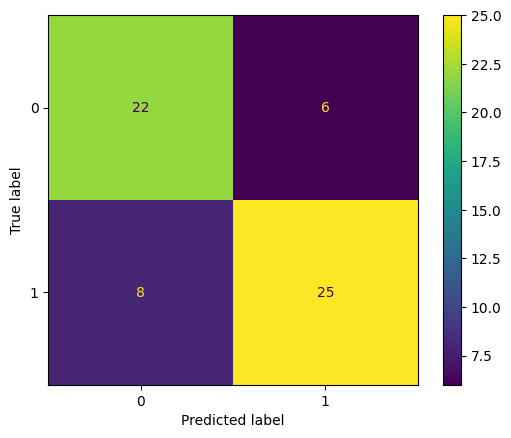

In [ ]:
evaluation_parametrics("Machine Learning - Classification", Y_test, Y_pred_model4_rbf)

## Decision Tree

In [ ]:
heart_data = pd.read_csv('heart_disease_data.csv')

In [ ]:
heart_data = heart_data.drop_duplicates()

In [ ]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=42)

In [ ]:
# training data
model3 = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model3 = model3.fit(X_train,Y_train)

In [ ]:
# akurasi data yang sudah di training
X_train_prediction = model3.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8381742738589212


In [ ]:
# hasil prediksi
Y_pred = model3.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, Y_pred)
f1 = f1_score(Y_test,Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)

print('Akurasi dengan Model Decision Tree: ', test_data_accuracy)
print('f1 score dengan Model Decision Tree: ', f1)
print('Precision dengan Model Decision Tree: ', precision)
print('Recall dengan Model Decision Tree: ', recall)

Akurasi dengan Model Decision Tree:  0.7868852459016393
f1 score dengan Model Decision Tree:  0.8169014084507042
Precision dengan Model Decision Tree:  0.7631578947368421
Recall dengan Model Decision Tree:  0.8787878787878788



------------------------Machine Learning - Classification------------------------


Classification Report for Data Test

              precision    recall  f1-score   support

           0       0.83      0.68      0.75        28
           1       0.76      0.88      0.82        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.78        61

--------------------------------------------------------------------------


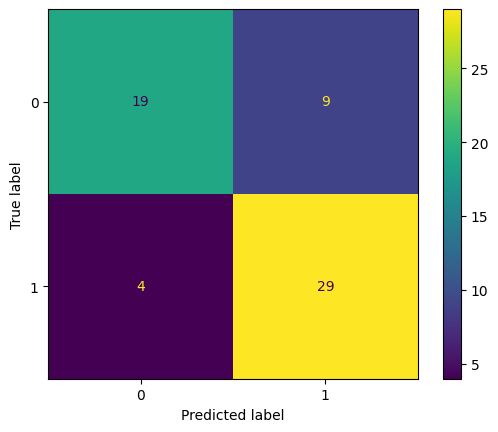

In [ ]:
evaluation_parametrics("Machine Learning - Classification", Y_test, Y_pred)

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(model3, out_file="tree_Heart_Disease.dot",class_names=["1","0"],feature_names=X.columns, impurity=False, filled=True)

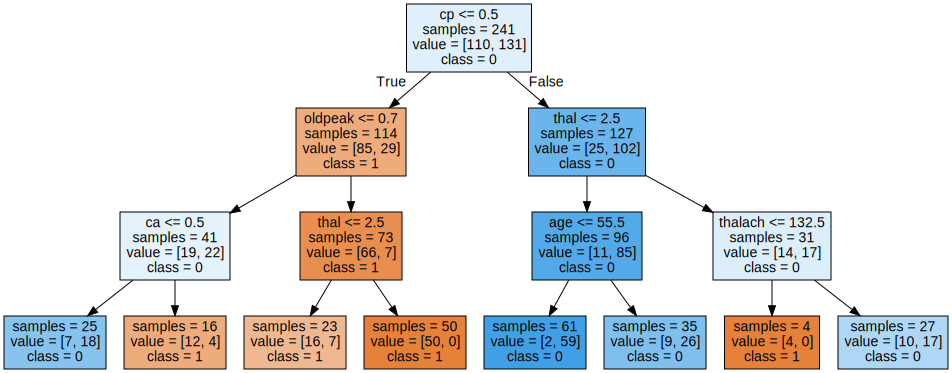

In [ ]:
import graphviz
with open("tree_Heart_Disease.dot") as fig:
  dot_graph= fig.read()
graphviz.Source(dot_graph)